# PART - A

# You were recently hired as a business analyst in a top sports company. The senior management team has asked you to come up with metrics with which they can gauge which team will win the upcoming La Liga cup (Football tournament). The given data set contains information on all the teams that have so far participated in all the past tournaments. It has data about how many goals each team scored, conceded; how many times they came within the first 6 positions, how many seasons they have qualified, their best position in the past, etc. You are required to do the following:
Before doing any analysis it would be a good idea to check for any hypens or other symbols the data set and make appropriate replacements to make sure you can perform arithmetic operations on the data. Prepare a short report to answer the following questions:

Which are the teams which started playing between 1930-1980?
Which are the top 5 teams in terms of points?
What is the distribution of the winning percentage for all teams?
Which teams are in the top 5 in terms of winning percentage? (Winning percentage= (GamesWon / GamesPlayed)*100)
Is there a significant difference in the winning percentage for teams which have attained a best position between 1-3 and those teams which have had a best position between 4-7.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import shapiro, mannwhitneyu

In [3]:
laliga = pd.read_csv('LaLiga.csv')
laliga.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,Pos,Team,Seasons,Points,GamesPlayed,GamesWon,GamesDrawn,GamesLost,GoalsFor,GoalsAgainst,Champion,Runner-up,Third,Fourth,Fifth,Sixth,T,Debut,Since/LastApp,BestPosition
1,1,Real Madrid,86,4385,2762,1647,552,563,5947,3140,33,23,8,8,3,4,79,1929,1929,1
2,2,Barcelona,86,4262,2762,1581,573,608,5900,3114,25,25,12,12,4,6,83,1929,1929,1
3,3,Atletico Madrid,80,3442,2614,1241,598,775,4534,3309,10,8,16,9,7,6,56,1929,2002-03,1
4,4,Valencia,82,3386,2664,1187,616,861,4398,3469,6,6,10,11,10,7,50,1931-32,1987-88,1


In [4]:
laliga.columns = laliga.loc[0,:]
laliga.columns

Index(['Pos', 'Team', 'Seasons', 'Points', 'GamesPlayed', 'GamesWon',
       'GamesDrawn', 'GamesLost', 'GoalsFor', 'GoalsAgainst', 'Champion',
       'Runner-up', 'Third', 'Fourth', 'Fifth', 'Sixth', 'T', 'Debut',
       'Since/LastApp', 'BestPosition'],
      dtype='object', name=0)

In [5]:
laliga.columns = ['Pos', 'Team', 'Seasons', 'Points', 'GamesPlayed', 'GamesWon',
       'GamesDrawn', 'GamesLost', 'GoalsFor', 'GoalsAgainst', 'Champion',
       'Runnerup', 'Third', 'Fourth', 'Fifth', 'Sixth', 'T', 'Debut',
       'SinceLastApp', 'BestPosition']

In [6]:
laliga.head()

,Pos,Team,Seasons,Points,GamesPlayed,GamesWon,GamesDrawn,GamesLost,GoalsFor,GoalsAgainst,Champion,Runnerup,Third,Fourth,Fifth,Sixth,T,Debut,SinceLastApp,BestPosition
0,Pos,Team,Seasons,Points,GamesPlayed,GamesWon,GamesDrawn,GamesLost,GoalsFor,GoalsAgainst,Champion,Runner-up,Third,Fourth,Fifth,Sixth,T,Debut,Since/LastApp,BestPosition
1,1,Real Madrid,86,4385,2762,1647,552,563,5947,3140,33,23,8,8,3,4,79,1929,1929,1
2,2,Barcelona,86,4262,2762,1581,573,608,5900,3114,25,25,12,12,4,6,83,1929,1929,1
3,3,Atletico Madrid,80,3442,2614,1241,598,775,4534,3309,10,8,16,9,7,6,56,1929,2002-03,1
4,4,Valencia,82,3386,2664,1187,616,861,4398,3469,6,6,10,11,10,7,50,1931-32,1987-88,1


In [7]:
laliga.drop(index=0, inplace=True)

# we have dropped the first row of the dataframe, unwanted data 

In [8]:
laliga.isna().sum()

# no null records were found

Pos             0
Team            0
Seasons         0
Points          0
GamesPlayed     0
GamesWon        0
GamesDrawn      0
GamesLost       0
GoalsFor        0
GoalsAgainst    0
Champion        0
Runnerup        0
Third           0
Fourth          0
Fifth           0
Sixth           0
T               0
Debut           0
SinceLastApp    0
BestPosition    0
dtype: int64

In [9]:
laliga.index = laliga['Team']

# we assign the index of laliga dataframe to be the Pos

In [12]:
laliga.drop(columns = ['Pos', 'Team'], inplace=True)

# we are dropping the Pos column as it is unnecessary column. We also drop Team column as we have already assigned it as Index.
# One can aso assign Pos as index, according ti their convinience.

In [13]:
laliga['Debut'].values

# we consider the absolute lower year as the Debut year. Same logic applies to SinceLastApp column too.

array(['1929', '1929', '1929', '1931-32', '1929', '1934-35', '1929',
       '1929', '1939-40', '1932-33', '1941-42', '1939-40', '1948-49',
       '1929', '1944-45', '1935-36', '1949-50', '1933-34', '1960-61',
       '1951-52', '1998-99', '1941-42', '1977-78', '1959-60', '2004-05',
       '1935-36', '1961-62', '1940-41', '1930-31', '1963-64', '1974-75',
       '1943-44', '1977-78', '1987-88', '1941-42', '1991-92', '2007-08',
       '1962-63', '1994-95', '1978-79', '1971-72', '1963-64', '1999-00',
       '2014-15', '1929', '1990-91', '1947-48', '1996-97', '1995-96',
       '1945-46', '1953-54', '1929', '1979-80', '1929', '1950-51',
       '2016-17', '2009-10', '1956-57', '1951-52', '1955-56', '2017-18'],
      dtype=object)

In [14]:
l = len(laliga['Debut'])
#print(l)
for i in range(l):
    laliga['Debut'][i] = laliga['Debut'][i][:4]
    laliga['SinceLastApp'][i] = laliga['SinceLastApp'][i][:4]

In [15]:
laliga['SinceLastApp'].values

array(['1929', '1929', '2002', '1987', '1929', '2001', '1994', '2010',
       '2012', '2015', '2014', '2012', '2013', '2011', '2015', '2016',
       '2008', '2000', '2012', '2015', '2013', '2016', '2015', '2014',
       '2015', '2010', '2009', '2007', '2016', '2015', '1998', '1987',
       '2005', '1996', '1990', '2004', '2014', '2014', '1997', '2008',
       '1979', '1969', '2008', '2014', '1934', '1992', '2006', '1998',
       '1997', '1950', '1957', '1931', '1980', '1930', '1993', '2016',
       '2009', '1956', '1951', '1955', '2017'], dtype=object)

In [16]:
# we have refined our data in Debut and SinceLastApp columns. We also have -  as data in many places. 
# So we are going to replacing it with numeircal zero
laliga.replace('-', 0, inplace=True)

In [17]:
laliga = laliga.astype(int)

In [18]:
laliga.dtypes

Seasons         int32
Points          int32
GamesPlayed     int32
GamesWon        int32
GamesDrawn      int32
GamesLost       int32
GoalsFor        int32
GoalsAgainst    int32
Champion        int32
Runnerup        int32
Third           int32
Fourth          int32
Fifth           int32
Sixth           int32
T               int32
Debut           int32
SinceLastApp    int32
BestPosition    int32
dtype: object

# Which are the teams which started playing between 1930-1980?

In [19]:
Team_started_playing_between_1930_1980 = pd.Series(laliga[(laliga['Debut'] >= 1930) & (laliga['Debut'] <= 1980)].sort_values(by = 'Debut').index)

print(Team_started_playing_between_1930_1980)

0                  Alaves
1                Valencia
2              Real Betis
3                  Oviedo
4                 Sevilla
5                Hercules
6                 Osasuna
7                Zaragoza
8              Celta Vigo
9                  Murcia
10                Granada
11    Deportivo La Coruna
12              Castellon
13               Sabadell
14         Sporting Gijon
15               Alcoyano
16              Gimnastic
17             Valladolid
18                 Malaga
19                 Lleida
20             Las Palmas
21        Atletico Tetuan
22                   Jaen
23       Cultural Leonesa
24                 Condal
25                  Elche
26               Mallorca
27               Tenerife
28                Cordoba
29                Levante
30             Pontevedra
31              Burgos CF
32              Salamanca
33         Rayo Vallecano
34                  Cadiz
35             Recreativo
36             AD Almeria
Name: Team, dtype: object


# Which are the top 5 teams in terms of points?

In [20]:
laliga.sort_values(by = 'Points', ascending=False)[:5]['Points']

Team
Real Madrid        4385
Barcelona          4262
Atletico Madrid    3442
Valencia           3386
Athletic Bilbao    3368
Name: Points, dtype: int32

# What is the distribution of the winning percentage for all teams? 
Which teams are in the top 5 in terms of winning percentage? (Winning percentage= (GamesWon / GamesPlayed)*100)

In [21]:
laliga['WinningPercentage'] = (laliga['GamesWon']/laliga['GamesPlayed'])*100

In [22]:
laliga.sort_values(by= 'WinningPercentage', ascending=False)['WinningPercentage'][:5]

Team
Real Madrid        59.630702
Barcelona          57.241130
Atletico Madrid    47.475134
Valencia           44.557057
Athletic Bilbao    43.772629
Name: WinningPercentage, dtype: float64

# Is there a significant difference in the winning percentage for teams which have attained a best position between 1-3 and those teams which have had a best position between 4-7.

In [23]:
winning_percentage_till_7 = laliga[(laliga['BestPosition']>=4) & (laliga['BestPosition']<=7)]['WinningPercentage']
winning_percentage_till_3 = laliga[(laliga['BestPosition']>=1) & (laliga['BestPosition']<=3)]['WinningPercentage']

In [24]:
shapiro(winning_percentage_till_7)

(0.9436671733856201, 0.2809881269931793)

In [25]:
shapiro(winning_percentage_till_3)

(0.8252524733543396, 0.003532945876941085)

Shapiro test confirms that one of the group isn't NORMAL, so we go for, independent unpaired two sample test of mean, mannwhitneyu

In [26]:
mannwhitneyu(winning_percentage_till_7, winning_percentage_till_3)

MannwhitneyuResult(statistic=11.0, pvalue=4.1876636593687686e-07)

It is observed that the p_value is less than 0.05, which means that, it rejects the NULL hypothesis. SO we can conclude that there is significant difference in the winning percentage for teams which have attained a best position between 1-3 and those teams which have had a best position between 4-7.

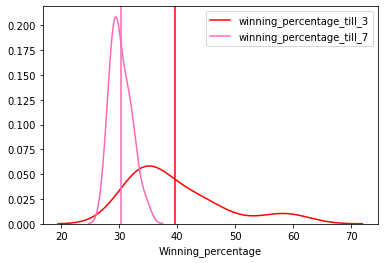

In [27]:
#POST- HOC ANALYSIS
sns.kdeplot(winning_percentage_till_3, color='red', label='winning_percentage_till_3')
plt.axvline(np.mean(winning_percentage_till_3), color='red')
sns.kdeplot(winning_percentage_till_7, color='hotpink', label='winning_percentage_till_7')
plt.axvline(np.mean(winning_percentage_till_7), color='hotpink')
plt.xlabel('Winning_percentage')
plt.legend()
plt.show()

It is very evident from the post - hoc analysis that there is a isgnificant diffeence between in the winning percentage for teams which have attained a best position between 1-3 and those teams which have had a best position between 4-7.

# PART- B

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2. A study was done to measure the blood pressure of 60 year old women with glaucoma. A random sample of 200 60-year old women with glaucoma was chosen. The mean of the systolic blood pressure in the sample was 140 mm Hg and the standard deviation was 25 mm Hg.

a)	Calculate the estimated standard error of the sample mean? What does the standard error indicate?
b)	Estimate a 95% confidence interval for the true mean blood pressure for all 60-year old women with glaucoma.
c)	Assume that instead of 200, a random sample of only 100 60-year old women with glaucoma was chosen. The sample mean and standard deviation estimates are the same as those in the original study. What is the estimated 95% confidence interval for the true mean blood pressure?
d)	Which of the two above intervals are wider?
e)	Explain in non-technical terms why the estimated standard error of a sample mean tends to decrease with an increase in sample size.


In [29]:
n = 200
x_bar = 140
sigma = 25

# a) Calculate the estimated standard error of the sample mean? What does the standard error indicate?

In [30]:
standard_error = sigma/(np.sqrt(n))
print('The standard error of the sample mean is',standard_error, 'Hg per person')

The standard error of the sample mean is 1.7677669529663687 Hg per person


The standard error is a statistical term that measures the accuracy with which a sample distribution represents a population by using standard deviation. In statistics, a sample mean deviates from the actual mean of a population—this deviation is the standard error of the mean.

The sample mean deviates from the actual mean by 1.768 units.

# b) Estimate a 95% confidence interval for the true mean blood pressure for all 60-year old women with glaucoma.

In [31]:
print('The 95% CI for the true mean blood pressure for all 60 year old women with glaucoma is')
print()
print(x_bar - (1.96 * standard_error),',', x_bar + (1.96 * standard_error))

The 95% CI for the true mean blood pressure for all 60 year old women with glaucoma is

136.5351767721859 , 143.4648232278141


# c) Assume that instead of 200, a random sample of only 100 60-year old women with glaucoma was chosen. The sample mean and standard deviation estimates are the same as those in the original study. What is the estimated 95% confidence interval for the true mean blood pressure?

In [32]:
n_new =100
x_bar = 140
sigma = 25

In [33]:
standard_error_new = sigma/(np.sqrt(n_new))
standard_error_new

2.5

In [34]:
# for 95% CI of true mean

In [35]:
print('The 95% CI for the true mean blood pressure for sample of 100 women for all 60 year old women with glaucoma is')
print()
print(x_bar - (1.96 * standard_error_new),',', x_bar + (1.96 * standard_error_new))

The 95% CI for the true mean blood pressure for sample of 100 women for all 60 year old women with glaucoma is

135.1 , 144.9


# d) Which of the two above intervals are wider?

From the above calculations we found that for percentage of confidence interval, the interval has got larger for lesser number of samples, compared to the greater number of samples.

In other words, we can also say that, as the number of sample increases for same percentage of confidence interval, the interval will decrease, and vice-versa.

# e) Explain in non-technical terms why the estimated standard error of a sample mean tends to decrease with an increase in sample size.

In layman terms, we can correlate from confidence interval and the standard error as follows.

We all know that, standard error is a measure of deviation from the sample mean of sample distributions of a population. So as the sample size increases, we get more samples from the population which represents it so good. If the sample size is less, then we may or may not get sample with good population representation.

Hence with increase in the sample size, we get good population representaion samples and can easily get closer to our sample mean. Which alternatley, decreases the deviation from the sample mean (standard error).

# PART-C

Par Inc., is a major manufacturer of golf equipment. Management believes that Par’s market share could be increased with the introduction of a cut-resistant, longer-lasting golf ball. Therefore, the research group at Par has been investigating a new golf ball coating designed to resist cuts and provide a more durable ball. The tests with the coating have been promising.

        One of the researchers voiced concern about the effect of the new coating on driving distances. Par would like the new cut-resistant ball to offer driving distances comparable to those of the current-model golf ball. To compare the driving distances for the two balls, 40 balls of both the new and current models were subjected to distance tests. The testing was performed with a mechanical hitting machine so that any difference between the mean distances for the two models could be attributed to a difference in the design. The results of the tests, with distances measured to the nearest yard, are contained in the data set “Golf”.

=>Formulate and present the rationale for a hypothesis test that Par could use to compare the driving distances of the current and new golf balls.
=>Analyze the data to provide the hypothesis testing conclusion. What is the p-value for your test? What is your recommendation for Par Inc.?
=>What is the 95% confidence interval for the population mean of each model, and what is the 95% confidence interval for the difference between the means of the two population?

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import shapiro
from scipy.stats import ttest_ind

In [36]:
golf = pd.read_csv('Golf.csv')
golf.head()

,Current,New
0,264,277
1,261,269
2,267,263
3,272,266
4,258,262


Formulate and present the rationale for a hypothesis test that Par could use to compare the driving distances of the current and new golf balls.
We formulate our hypothesis as,

Ho : The mean driving distance of the current golf ball is equal to the mean driving distance of the new golf balls.

Ha : The mean driving distance of the current golf ball is not equal to the mean driving distance of the new golf balls.

we perform two sample t test to compare the mean of these two ball groups

Before that we perform test of normality, to check for the normality of the the two groups of data.

In [37]:
shapiro(golf['Current'])

(0.9707046747207642, 0.378787100315094)

In [38]:
shapiro(golf['New'])

(0.9678263664245605, 0.3064655363559723)

both the groups have p_val > 0.05, which means that they both are NORMAL (normally distributed). Hence we go for independent parametric two sample t test using ttest_ind().

# 2. Analyze the data to provide the hypothesis testing conclusion. What is the p-value for your test? What is your recommendation for Par Inc.?

In [41]:
tstat, pval = ttest_ind(golf['Current'], golf['New'])
print('The test_statistics is', tstat,' and the p_value for the test is',pval)

The test_statistics is 1.3283615935245678  and the p_value for the test is 0.18793228491854663


It is observed that the p_value for the test is greater than 0.05, hence we reject our NULL hypothesis.

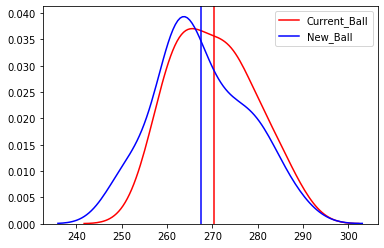

In [42]:
#POST-HOC ANALYSIS
sns.kdeplot(golf['Current'], color='Red', label = 'Current_Ball')
plt.axvline(np.mean(golf['Current']), color='Red')
sns.kdeplot(golf['New'], color='Blue', label = 'New_Ball')
plt.axvline(np.mean(golf['New']), color='Blue')
plt.legend()
plt.show()

It is evident from the analysis that the mean driving distance of the current golf ball is less than mean driving distance of the new golf balls.

# What is the 95% confidence interval for the population mean of each model, and what is the 95% confidence interval for the difference between the means of the two population

In [49]:
mean_new_ball = np.mean(golf['New'])
mean_current_ball = np.mean(golf['Current'])


In [50]:
mean_new_ball

267.5

In [52]:
#95% conf_int for new ball
mean_new_ball - 1.96*np.std(golf['New']),mean_new_ball + 1.96*np.std(golf['New'])

(248.3460761200218, 286.6539238799782)

In [53]:
#95% conf_int for current ball
mean_current_ball - 1.96*np.std(golf['Current']),mean_current_ball + 1.96*np.std(golf['Current'])

(253.33495516534856, 287.2150448346514)

In [55]:
# what is the 95% confidence interval for the difference between the means of the two population

In [57]:
std_new_ball = np.std(golf['New'])
std_current_ball = np.std(golf['Current'])

In [63]:
(std_new_ball)**2/len(golf['New'])

2.3875

In [ ]:
#lower bound

In [64]:
(mean_new_ball-mean_current_ball) + 1.96*((std_new_ball)**2/len(golf['New']) + (std_current_ball)**2/len(golf['Current']))

5.564769375000022

In [ ]:
#upper bound

In [62]:
(mean_new_ball-mean_current_ball) - 1.96*((std_new_ball)**2/len(golf['New']) + (std_current_ball)**2/len(golf['Current']))

-11.114769374999977